In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import time
import re
import nltk
import math
import os
import matplotlib.spines
import matplotlib.pyplot as plt
import sklearn.metrics
import json 
from datetime import datetime

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.linear_model import Perceptron

from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score

import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import pickle

%matplotlib inline


In [2]:
# https://stackoverflow.com/questions/956867/how-to-get-string-objects-instead-of-unicode-from-json

def byteify(input):
    if isinstance(input, dict):
        return {byteify(key): byteify(value)
                for key, value in input.iteritems()}
    elif isinstance(input, list):
        return [byteify(element) for element in input]
    elif isinstance(input, unicode):
        return input.encode('utf-8')
    else:
        return input

In [3]:
# from https://pynative.com/python-json-load-and-loads-to-parse-json/

with open("ultimate_data_challenge.json", "r") as read_file:
    print("Converting JSON encoded data into Python dictionary")
    data_challenge = json.load(read_file)


Converting JSON encoded data into Python dictionary


In [4]:
data = byteify(data_challenge) 

#for item in data:
    #print(item)
    #print

In [5]:
type(data)

list

In [6]:
print(len(data))

50000


In [7]:
# Create a Pandas Dataframe from the list of dictionaries above
df = pd.DataFrame(data)  

df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [8]:
df.tail()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
49995,5.63,4.2,5.0,1.0,King's Landing,2014-06-05,iPhone,2014-01-25,0.0,0,False,100.0
49996,0.00,4.0,NaN,1.0,Astapor,2014-01-25,iPhone,2014-01-24,0.0,1,False,0.0
49997,3.86,5.0,5.0,1.0,Winterfell,2014-05-22,Android,2014-01-31,0.0,0,True,100.0
49998,4.58,3.5,3.0,1.0,Astapor,2014-01-15,iPhone,2014-01-14,0.0,2,False,100.0
49999,3.49,5.0,NaN,1.0,Astapor,2014-04-20,Android,2014-01-18,0.0,0,False,0.0


In [9]:
df.shape

(50000, 12)

In [10]:
df.dtypes

avg_dist                  float64
avg_rating_by_driver      float64
avg_rating_of_driver      float64
avg_surge                 float64
city                       object
last_trip_date             object
phone                      object
signup_date                object
surge_pct                 float64
trips_in_first_30_days      int64
ultimate_black_user          bool
weekday_pct               float64
dtype: object

In [11]:
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [12]:
# replace nulls in phone column with the string 'Unknown'
df["phone"].fillna("Unknown", inplace = True) 

In [13]:
df['avg_rating_by_driver'].fillna((df['avg_rating_by_driver'].mean()), inplace=True)

In [14]:
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver         0
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                        0
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [15]:
#Convert date as strings into datetime objects
# & overwrite orignial columns

df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [16]:
df.dtypes

avg_dist                         float64
avg_rating_by_driver             float64
avg_rating_of_driver             float64
avg_surge                        float64
city                              object
last_trip_date            datetime64[ns]
phone                             object
signup_date               datetime64[ns]
surge_pct                        float64
trips_in_first_30_days             int64
ultimate_black_user                 bool
weekday_pct                      float64
dtype: object

In [17]:
df['month_last_trip'] = pd.DatetimeIndex(df['last_trip_date']).month

In [18]:
df.month_last_trip.value_counts()

6    18256
1    10147
5     7585
4     4588
3     4568
2     4308
7      548
Name: month_last_trip, dtype: int64

In [19]:
df['month_signup'] = pd.DatetimeIndex(df['signup_date']).month

df.month_signup.value_counts()

1    50000
Name: month_signup, dtype: int64

In [20]:
df['delta_time_last_trip_months'] = (df['last_trip_date'] - df['signup_date'])/np.timedelta64(1,'M')

In [21]:
# New function to create a category class
# if the user used Ultimate within first 30 days from signging up
def retained_or_not(trips):
    if trips > 0:
        return 1
    else:
        return 0
       

In [22]:
df['retain_status'] = df['trips_in_first_30_days'].apply(retained_or_not)

In [23]:
# New function to create a category class
# if the user is still using the service in June or July they are long term ,'lt'
def long_term_or_not2(month):
    if month >=6:
        return 'lt'
        #return 1
    else:
        #return  0
        return 'st'

In [24]:
#df['long_term_status'] = df['delta_time_last_trip_months'].apply(long_term_or_not)
df['long_term_status'] = df['month_last_trip'].apply(long_term_or_not2)

In [25]:
df.columns

Index([u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver',
       u'avg_surge', u'city', u'last_trip_date', u'phone', u'signup_date',
       u'surge_pct', u'trips_in_first_30_days', u'ultimate_black_user',
       u'weekday_pct', u'month_last_trip', u'month_signup',
       u'delta_time_last_trip_months', u'retain_status', u'long_term_status'],
      dtype='object')

In [26]:
df.long_term_status.value_counts()

st    31196
lt    18804
Name: long_term_status, dtype: int64

In [27]:
#df.delta_time_last_trip_months.value_counts()

In [28]:
df.month_last_trip.value_counts()

6    18256
1    10147
5     7585
4     4588
3     4568
2     4308
7      548
Name: month_last_trip, dtype: int64

In [29]:
df.retain_status.value_counts()

1    34610
0    15390
Name: retain_status, dtype: int64

In [69]:
df.retain_status.value_counts(normalize=True)

1    0.6922
0    0.3078
Name: retain_status, dtype: float64

In [30]:
df.dtypes

avg_dist                              float64
avg_rating_by_driver                  float64
avg_rating_of_driver                  float64
avg_surge                             float64
city                                   object
last_trip_date                 datetime64[ns]
phone                                  object
signup_date                    datetime64[ns]
surge_pct                             float64
trips_in_first_30_days                  int64
ultimate_black_user                      bool
weekday_pct                           float64
month_last_trip                         int64
month_signup                            int64
delta_time_last_trip_months           float64
retain_status                           int64
long_term_status                       object
dtype: object

In [31]:
df.groupby(['long_term_status','phone']).size()

long_term_status  phone  
lt                Android     3146
                  Unknown      133
                  iPhone     15525
st                Android    11876
                  Unknown      263
                  iPhone     19057
dtype: int64

In [32]:
df.groupby(['phone']).size()

phone
Android    15022
Unknown      396
iPhone     34582
dtype: int64

In [33]:
df[df.long_term_status == 'lt'].ultimate_black_user.value_counts()

True     9497
False    9307
Name: ultimate_black_user, dtype: int64

In [34]:
df[df.long_term_status == 'st'].ultimate_black_user.value_counts()

False    21839
True      9357
Name: ultimate_black_user, dtype: int64

## Almost half of long term users of Ultimate have tried the Ultimate black, whatever that is.
## In contrast, less than half of short term users have tried the Ultimate black.
## Maybe suggest to Ultimate, to offer Ultimate black experience to new users at a discount price as a way to retain users for the long term. Just a thought!

In [35]:
df[df.long_term_status == 'lt'].trips_in_first_30_days.mean()

3.3063178047223993

In [36]:
df[df.long_term_status == 'lt'].avg_rating_by_driver.mean()

4.762801196290921

In [37]:
df[df.long_term_status == 'lt'].avg_rating_of_driver.mean()

4.592930351735465

In [38]:
df[df.long_term_status == 'st'].trips_in_first_30_days.mean()

1.6584818566482882

In [39]:
df[df.long_term_status == 'st'].avg_rating_by_driver.mean()

4.787414928270617

In [40]:
df[df.long_term_status == 'st'].avg_rating_of_driver.mean()

4.607556868776835

In [41]:
df.groupby(['long_term_status']).city.value_counts()

long_term_status  city          
lt                Winterfell         8213
                  King's Landing     6363
                  Astapor            4228
st                Winterfell        15123
                  Astapor           12306
                  King's Landing     3767
Name: city, dtype: int64

In [42]:
df.groupby(['phone','long_term_status']).size()

phone    long_term_status
Android  lt                   3146
         st                  11876
Unknown  lt                    133
         st                    263
iPhone   lt                  15525
         st                  19057
dtype: int64

In [43]:
df.groupby(['city','long_term_status']).size()

city            long_term_status
Astapor         lt                   4228
                st                  12306
King's Landing  lt                   6363
                st                   3767
Winterfell      lt                   8213
                st                  15123
dtype: int64

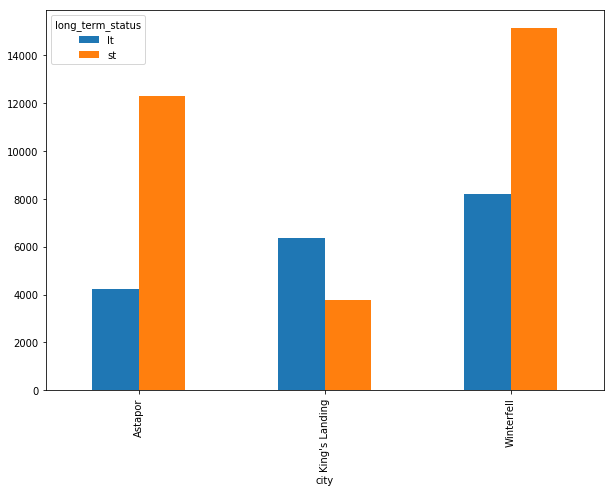

In [44]:
#plt.figure(figsize=(19,9))
df.groupby(['city','long_term_status']).size().unstack().plot(kind='bar',figsize=(10,7))

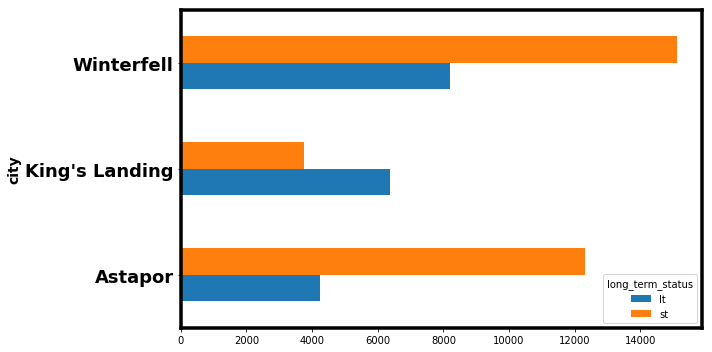

In [45]:
#plt.figure(figsize=(19,9))
# useful link for working with matplotlib figures written by Kim
# https://towardsdatascience.com/simple-ways-to-improve-your-matplotlib-b64eebccfd5

df.groupby(['city','long_term_status']).size().unstack().plot(kind='barh',figsize=(10,5))
plt.yticks(fontsize=18,weight='bold')
plt.ylabel('city', fontsize=14, weight='bold')
plt.gca().spines['top'].set_linewidth(3.5)
plt.gca().spines['right'].set_linewidth(3.5)
plt.gca().spines['bottom'].set_linewidth(3.5)
plt.gca().spines['left'].set_linewidth(3.5)
plt.tight_layout()

#plt.savefig('Ultimate_users_city_status.png')

In [46]:
city_user = df.groupby(['city','long_term_status']).size().unstack()

city_user

long_term_status,lt,st
city,,
Astapor,4228,12306
King's Landing,6363,3767
Winterfell,8213,15123


In [47]:
city_user.columns

Index([u'lt', u'st'], dtype='object', name=u'long_term_status')

In [48]:
#sns.barplot(x="lt", y="city",  data=city_user)

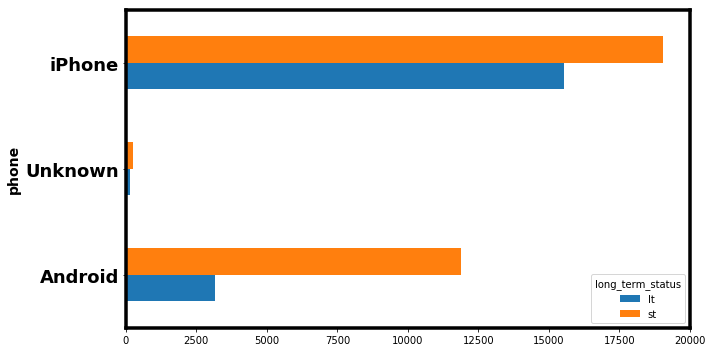

In [49]:
#plt.figure(figsize=(19,9))
df.groupby(['phone','long_term_status']).size().unstack().plot(kind='barh',figsize=(10,5))
plt.yticks(fontsize=18,weight='bold')
plt.ylabel('phone', fontsize=14, weight='bold')
# adjust line width of figure/graph frame,spines
plt.gca().spines['top'].set_linewidth(3.5)
plt.gca().spines['right'].set_linewidth(3.5)
plt.gca().spines['bottom'].set_linewidth(3.5)
plt.gca().spines['left'].set_linewidth(3.5)
#plt.title('phone use by status')
plt.tight_layout()
#plt.savefig('Ultimate_users_phone_status.png')

In [50]:
df.groupby(['ultimate_black_user','long_term_status']).size()

ultimate_black_user  long_term_status
False                lt                   9307
                     st                  21839
True                 lt                   9497
                     st                   9357
dtype: int64

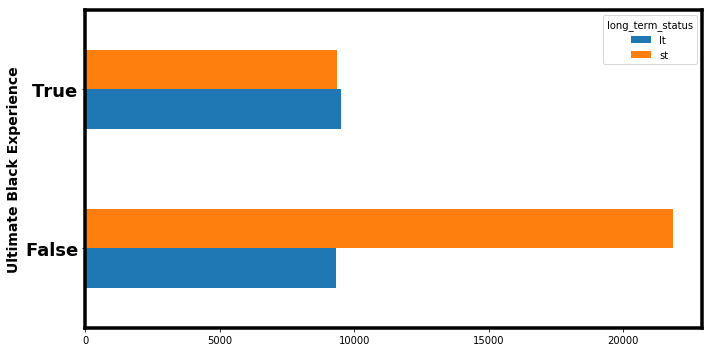

In [51]:
df.groupby(['ultimate_black_user','long_term_status']).size().unstack().plot(kind='barh',figsize=(10,5))
plt.yticks(fontsize=18,weight='bold')
plt.ylabel('Ultimate Black Experience', fontsize=14, weight='bold')
# adjust line width of figure/graph frame,spines
plt.gca().spines['top'].set_linewidth(3.5)
plt.gca().spines['right'].set_linewidth(3.5)
plt.gca().spines['bottom'].set_linewidth(3.5)
plt.gca().spines['left'].set_linewidth(3.5)
#plt.title('phone use by status')
plt.tight_layout()
#plt.savefig('Ultimate_Users_Black_Experience.png')

In [52]:
df.groupby(['long_term_status']).weekday_pct.mean()

long_term_status
lt    61.389034
st    60.647032
Name: weekday_pct, dtype: float64

In [53]:
df.groupby(['long_term_status']).surge_pct.mean()

long_term_status
lt    9.152797
st    8.666739
Name: surge_pct, dtype: float64

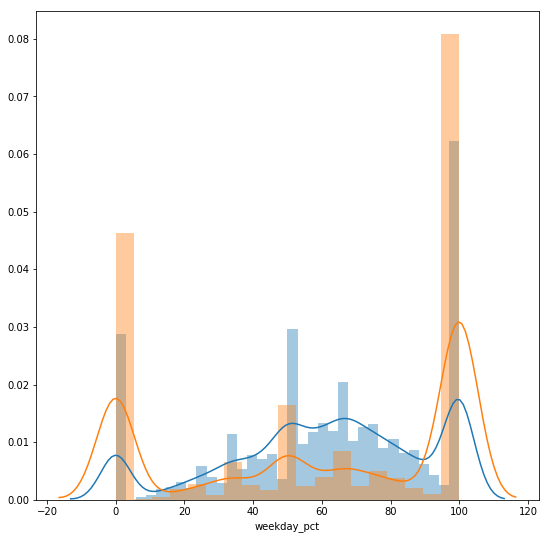

In [54]:
plt.figure(figsize = [9,9])

sns.distplot(df[df['long_term_status']== 'lt'].weekday_pct)
sns.distplot(df[df['long_term_status']== 'st'].weekday_pct)

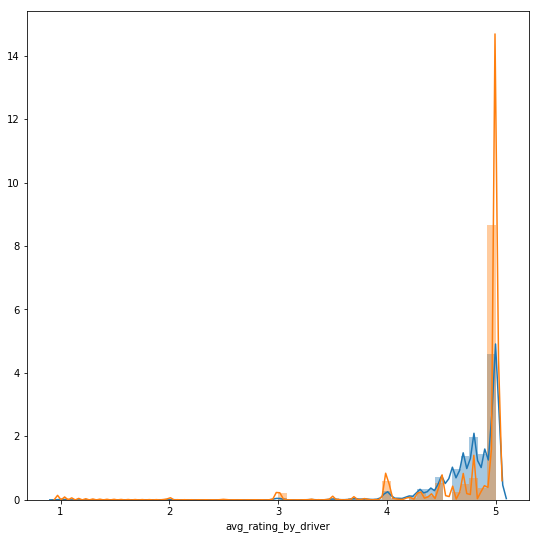

In [55]:
plt.figure(figsize = [9,9])

sns.distplot(df[df['long_term_status']== 'lt'].avg_rating_by_driver)
sns.distplot(df[df['long_term_status']== 'st'].avg_rating_by_driver)

(-5, 11)

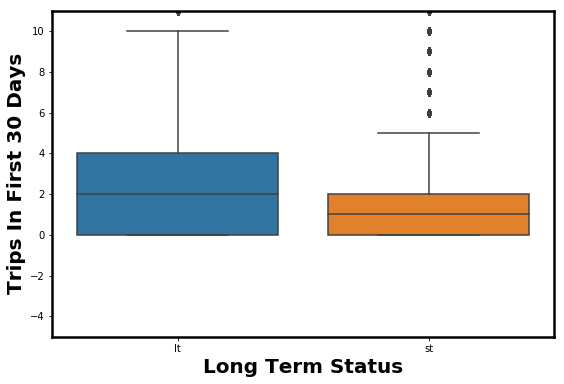

In [56]:

fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.boxplot(x="long_term_status", y="trips_in_first_30_days", data=df)
plt.xlabel('Long Term Status',weight = 'bold',size =20)
plt.ylabel('Trips In First 30 Days',weight = 'bold',size =20)
plt.ylim(-5, 11)

(-5, 21)

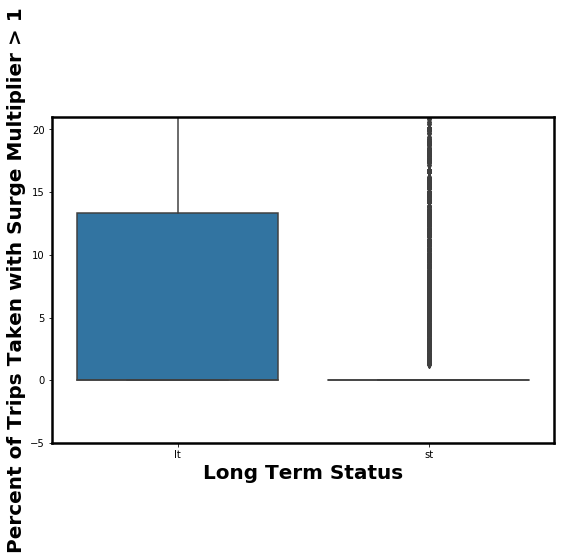

In [57]:
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.boxplot(x="long_term_status", y="surge_pct", data=df)
plt.xlabel('Long Term Status',weight = 'bold',size =20)
plt.ylabel('Percent of Trips Taken with Surge Multiplier > 1',weight = 'bold',size =20)
plt.ylim(-5, 21)

## There are more long term Ultimate users in  King's Landing than short term users by a ratio of ~ 1.7

## In contrast, there are more short term than long term Ultimate users in Winterfell by a ratio of ~ 1.8

## While in Astapor, there are more short term users than long term Ultimate users by a ratio of ~ 2.9. The citizens of Astapor do NOT prefer Ultimate's service.  

In [58]:
# save the dataframe table as a csv file
#df.to_csv('Ultimate_Users_2014.csv',index = None)

#df_Users = pd.read_csv('Ultimate_Users_2014.csv')

#df_Users.head()

In [59]:
#df_Users.tail()

Text(0,0.5,'Frequency')

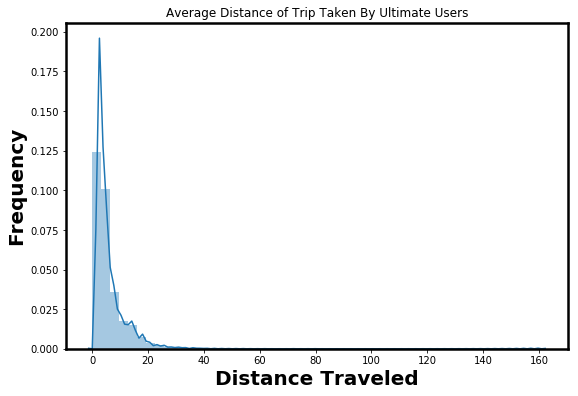

In [60]:
#sns.distplot(df.review_scores_rating)
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.distplot(df.avg_dist)
plt.title("Average Distance of Trip Taken By Ultimate Users")
plt.xlabel('Distance Traveled',weight = 'bold',size =20)
plt.ylabel('Frequency',weight = 'bold',size =20)

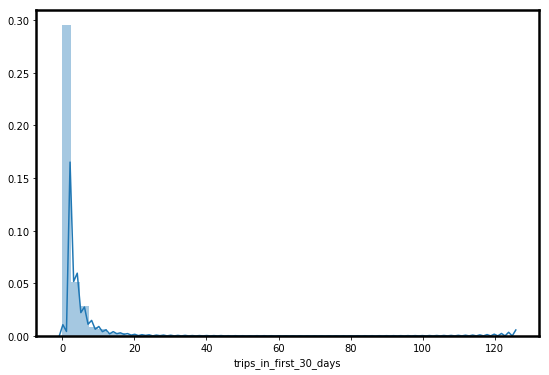

In [61]:
#sns.distplot(df.review_scores_rating)
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.distplot(df.trips_in_first_30_days)

In [62]:
print(np.mean(df.trips_in_first_30_days))

2.2782


(0, 25)

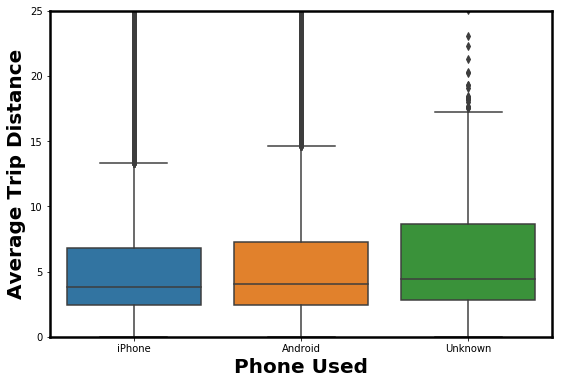

In [63]:
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.boxplot(x="phone", y="avg_dist", data=df)
plt.xlabel('Phone Used',weight = 'bold',size =20)
plt.ylabel('Average Trip Distance',weight = 'bold',size =20)
plt.ylim(0, 25)

(0, 25)

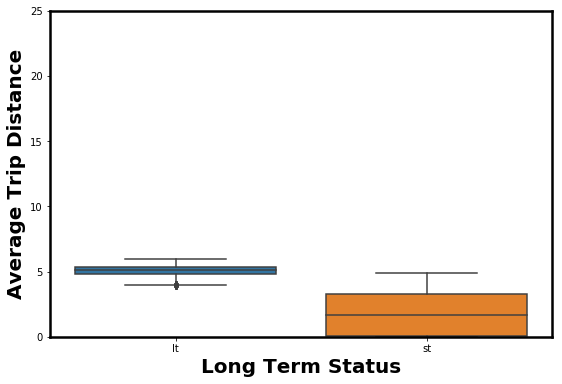

In [64]:
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.boxplot(x="long_term_status", y="delta_time_last_trip_months", data=df)
plt.xlabel('Long Term Status',weight = 'bold',size =20)
plt.ylabel('Average Trip Distance',weight = 'bold',size =20)
plt.ylim(0, 25)

In [65]:
print(np.mean(df.delta_time_last_trip_months))

3.04860797963


In [66]:
print(df.delta_time_last_trip_months.describe())

count    50000.000000
mean         3.048608
std          2.041268
min          0.000000
25%          0.887082
50%          3.614037
75%          4.928233
max          5.946734
Name: delta_time_last_trip_months, dtype: float64


Text(0.5,1,'Distribution of Time Delta from Signup To Last Trip in Months')

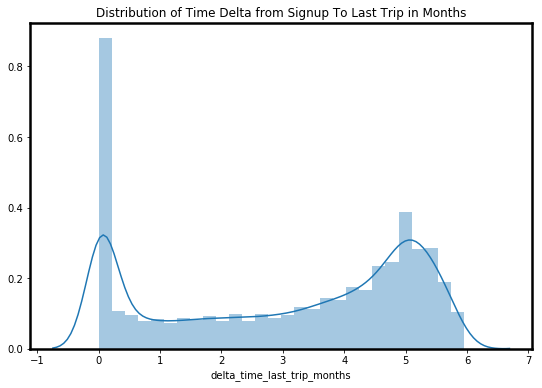

In [67]:
# distribution plot of delta time in Months
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
sns.distplot(df.delta_time_last_trip_months)
plt.title('Distribution of Time Delta from Signup To Last Trip in Months')
#plt.title('Distribution of Time Delta from Signup To Last Trip in Days')

## Uh oh!,  Looks like Ultimate has a hard time retaining users for more than 6 months!

## Understanding  Pandas timestamps and delta time function

In [68]:
# http://www.datasciencemadesimple.com/difference-two-dates-days-weeks-months-years-pandas-python-2/
timeB = pd.Timestamp('2014-06-21')
timeA = pd.Timestamp('2014-01-18')

deltaTime = timeB - timeA
print('Time Difference')
print(deltaTime)
print
print('Time Difference in Months')
print(deltaTime/np.timedelta64(1,'M'))
print
print('Time Difference in Days')
print(deltaTime/np.timedelta64(1,'D'))
print
print('Time Difference in Weeks')
print(deltaTime/np.timedelta64(1,'W'))
print

Time Difference
154 days 00:00:00

Time Difference in Months
5.05965214891

Time Difference in Days
154.0

Time Difference in Weeks
22.0

